In [1]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import re                                #正则表达式，可用于匹配中文文本
import collections
import matplotlib.pyplot as plt

df = pd.read_csv("一级评论2.csv", encoding='utf-8') 


print(df.head())
print(len(df))



                                             content
0                                             闭嘴吧这人，
1                   那么，你道德的底线在哪，两个活生生的生命拿来儿戏吗，拿来做实验？
2                                     你再装？早上不是牛逼轰轰的？
3                                      搞不好改基因生成新的遗传病
4  霍金预测的超级人类魔盒打开了，富人通过改造变成超高智商，超抵抗力，下层永远被奴隶，别人不老不...
1773


In [2]:
df = df.dropna() #去除空值所在的整条(行)数据
print(len(df))

1773


In [3]:
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords


In [4]:
# 对句子去除停用词
def movestopwords(sentence):
    stopwords = stopwordslist('scu_stopwords.txt')
    outstr = ''
    for word in sentence:
        if word not in stopwords:
            if word != '\t'and'\n':
                outstr += word # outstr += " "
    return outstr


In [5]:
# 分词函数
def chinese_word_cut(mytext):
    import jieba.posseg as psg
    checkarr = ['n']
    returnmsg = "".join([(x.word) for x in psg.cut(mytext) if (x.flag in checkarr)])
    return returnmsg



In [6]:
# 分词结果  
df = df.content.apply(chinese_word_cut)
ff = df.apply(movestopwords)
ff = ff.dropna()

print(ff) #预览

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.851 seconds.
Prefix dict has been built succesfully.


0                                             
1                                      底线活生生儿戏
2                                            牛
3                                        基因遗传病
4       人类魔盒富人智商抵抗力下层奴隶不病智力超群基因人科幻片人类超基因人类奴隶世界
                         ...                  
1768                                        底线
1769                                          
1770                                      卧槽大片
1771                                        陽葵
1772                            秘密办法人类人螃蟹结果双胞胎
Name: content, Length: 1773, dtype: object


In [7]:
word_counts = collections.Counter(ff) # 对分词做词频统计

word_counts_top10 = word_counts.most_common(11) # 获取前11最高频的词

word_counts_top10 = word_counts_top10[1:10]
print (word_counts_top10) 

[('人', 47), ('人类', 15), ('孩子', 10), ('底线', 9), ('口语', 8), ('感觉', 7), ('事', 6), ('事情', 5), ('上帝', 5)]


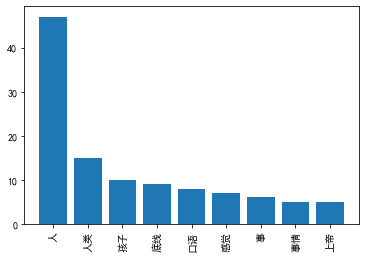

In [8]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

wa=dict(word_counts_top10)
plt.bar(wa.keys(),wa.values())
plt.xticks(rotation=90)
plt.show()

In [9]:
#从文件导入停用词表
stpwrdpath = "scu_stopwords.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read().decode('utf-8')#将停用词表转换为list
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()



In [10]:
# 调用sklearn机器学习包进行向量化
n_features = 1000 # 指定特征关键词提取最大值
tf_vectorizer = CountVectorizer(strip_accents='unicode',# 去除raw document中的重音符号
    max_features=n_features,#stop_words='english', # 停用词
    stop_words=stpwrdlst,
    max_df=0.5, # 阈值如果某个词的document frequence大于max_df，不当作关键词.float，词出现的次数与语料库文档数的百分比，int出现次数
    min_df=3) # 如果某个词的document frequence小于min_df，则这个词不会被当作关键词


tf = tf_vectorizer.fit_transform(df)
print(tf)
print('\nvocabulary list:\n\n',tf_vectorizer.get_feature_names())
print( '\nvocabulary dic :\n\n',tf_vectorizer.vocabulary_)

  (17, 2)	1
  (22, 0)	1
  (58, 16)	1
  (59, 16)	1
  (97, 23)	1
  (107, 12)	1
  (118, 0)	1
  (135, 7)	1
  (160, 19)	1
  (163, 3)	1
  (173, 3)	1
  (179, 24)	1
  (184, 23)	1
  (185, 21)	1
  (187, 21)	1
  (188, 22)	1
  (192, 3)	1
  (209, 11)	1
  (211, 3)	1
  (297, 10)	1
  (299, 9)	1
  (303, 9)	1
  (307, 10)	1
  (312, 6)	1
  (314, 9)	1
  :	:
  (1480, 25)	1
  (1498, 16)	1
  (1504, 4)	1
  (1514, 14)	1
  (1523, 3)	1
  (1526, 24)	1
  (1530, 7)	1
  (1540, 17)	1
  (1563, 7)	1
  (1587, 13)	1
  (1589, 5)	1
  (1614, 2)	1
  (1639, 7)	1
  (1642, 6)	1
  (1671, 11)	1
  (1685, 12)	1
  (1697, 11)	1
  (1702, 0)	1
  (1712, 2)	1
  (1719, 25)	1
  (1735, 25)	1
  (1755, 11)	1
  (1756, 17)	1
  (1764, 24)	1
  (1768, 11)	1

vocabulary list:

 ['上帝', '世界', '事情', '人类', '历史', '口语', '字幕', '孩子', '孩子人', '家伙天才前者', '小孩孩子孩子人基因人类乱套有钱人孩子基因小孩孩子人类物种', '底线', '感觉', '技术', '有点', '毒液', '疯子', '疾病', '科学家', '科技', '细思', '视频', '评论', '遗传病', '间谍', '魔盒']

vocabulary dic :

 {'事情': 2, '上帝': 0, '疯子': 16, '遗传病': 23, '感觉': 12, '孩子': 7, '科技': 1

In [11]:
# LDA操作
n_topics = 5 # 人为指定划分的主题数
lda = LatentDirichletAllocation(n_topics,learning_method='online',max_iter=50,random_state=0 )
lda.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [12]:
# 显示主题关键词函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('\nTopic Nr.%d:' % int(topic_idx + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
n_top_words = 10 # 主题输出前20个关键词
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)





Topic Nr.1:
事情 5.43 | 上帝 5.32 | 有点 5.22 | 历史 4.2 | 疯子 4.11 | 疾病 3.49 | 小孩孩子孩子人基因人类乱套有钱人孩子基因小孩孩子人类物种 3.03 | 细思 0.2 | 字幕 0.2 | 孩子 0.2 | 

Topic Nr.2:
口语 8.05 | 感觉 7.33 | 评论 5.07 | 毒液 4.16 | 科学家 4.09 | 细思 0.2 | 字幕 0.2 | 小孩孩子孩子人基因人类乱套有钱人孩子基因小孩孩子人类物种 0.2 | 疾病 0.2 | 孩子 0.2 | 

Topic Nr.3:
遗传病 3.99 | 魔盒 3.71 | 孩子人 3.1 | 科技 3.06 | 家伙天才前者 3.03 | 视频 3.02 | 细思 0.2 | 疾病 0.2 | 字幕 0.2 | 小孩孩子孩子人基因人类乱套有钱人孩子基因小孩孩子人类物种 0.2 | 

Topic Nr.4:
底线 10.14 | 技术 5.28 | 间谍 4.37 | 世界 3.17 | 细思 0.2 | 疾病 0.2 | 字幕 0.2 | 小孩孩子孩子人基因人类乱套有钱人孩子基因小孩孩子人类物种 0.2 | 孩子 0.2 | 历史 0.2 | 

Topic Nr.5:
人类 14.92 | 孩子 10.22 | 字幕 4.13 | 细思 3.23 | 疾病 0.2 | 小孩孩子孩子人基因人类乱套有钱人孩子基因小孩孩子人类物种 0.2 | 历史 0.2 | 疯子 0.2 | 有点 0.2 | 事情 0.2 | 


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)

#让可视化可以在notebook内显示
pyLDAvis.show(data)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [30/Jun/2020 22:10:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:10:45] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:10:45] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:10:45] "GET /LDAvis.js HTTP/1.1" 200 -
